In [209]:
#import packages
import pandas as pd
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [210]:
#read the train and test datasets
train=pd.read_csv('path/train.csv', header=0)
test=pd.read_csv('path/test.csv', header=0)

In [211]:
#Shape of the datasets 
print('Shape of train dataset: ',train.shape)
print('Shape of test dataset: ',test.shape)
#Features in the datasets
print('Columns in train dataset: ',train.columns)
print('Columns in test dataset: ',test.columns)

Shape of train dataset:  (891, 12)
Shape of test dataset:  (418, 11)
Columns in train dataset:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns in test dataset:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [212]:
#Statistical summary of train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [213]:
#Statistical summary of test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [214]:
#displaying the top 20 instaces of the train dataset
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [215]:
#displaying the top 20 instaces of the test dataset
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [216]:
#Checking the number of null values in the columns of the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
#Checking the number of null values in the columns of the test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [218]:
#Analyzing the relationship between the features and the class

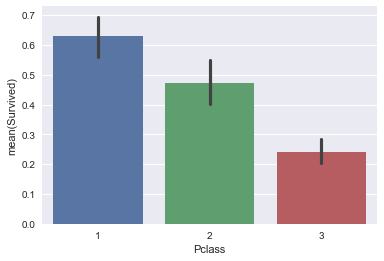

In [219]:
sns.barplot('Pclass','Survived', data=train)

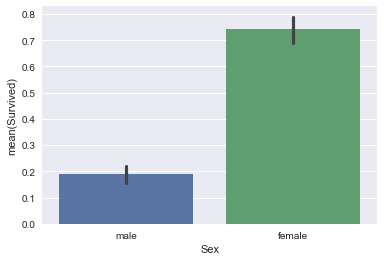

In [220]:
sns.barplot('Sex','Survived', data=train)

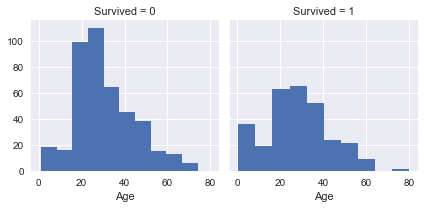

In [221]:
ageplot = sns.FacetGrid(train, col='Survived')
ageplot.map(plt.hist, 'Age', bins=10)

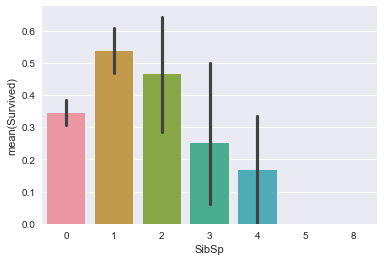

In [222]:
sns.barplot('SibSp','Survived', data=train)

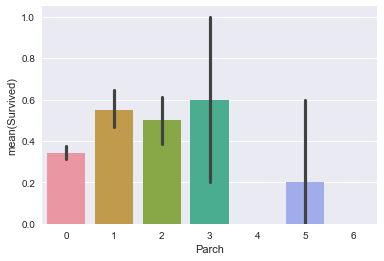

In [223]:
sns.barplot('Parch','Survived', data=train)

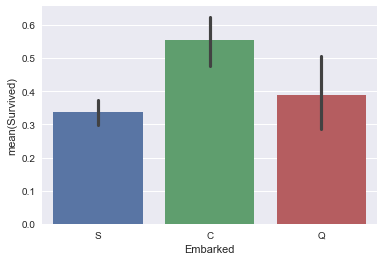

In [224]:
sns.barplot('Embarked','Survived', data=train)

In [225]:
#Splitting the feature name into features name, surname and title in the train dataset
train[['Surname', 'Name']] = train['Name'].str.split(',\s+', expand=True)
train['Title'] = train['Name'].str.split(' ').str[0]
#Displaying the top 20 instances from the train dataset
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.
5,6,0,3,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.
6,7,0,1,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.
7,8,0,3,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master.
8,9,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs.
9,10,1,2,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs.


In [226]:
#Splitting the feature name into features name, surname and title in the test dataset
test[['Surname', 'Name']] = test['Name'].str.split(',\s+', expand=True)
test['Title'] = test['Name'].str.split(' ').str[0]
#Displaying the top 20 instances of the test dataset
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,892,3,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr.
1,893,3,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs.
2,894,2,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr.
3,895,3,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr.
4,896,3,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs.
5,897,3,Mr. Johan Cervin,male,14.0,0,0,7538,9.2250,NaN,S,Svensson,Mr.
6,898,3,Miss. Kate,female,30.0,0,0,330972,7.6292,NaN,Q,Connolly,Miss.
7,899,2,Mr. Albert Francis,male,26.0,1,1,248738,29.0000,NaN,S,Caldwell,Mr.
8,900,3,Mrs. Joseph (Sophie Halaut Easu),female,18.0,0,0,2657,7.2292,NaN,C,Abrahim,Mrs.
9,901,3,Mr. John Samuel,male,21.0,2,0,A/4 48871,24.1500,NaN,S,Davies,Mr.


In [227]:
#Removing the unimportant features from the train dataset
train=train.drop(['PassengerId','Name','Ticket','Fare','Cabin','Surname'],axis=1)
#Displaying the top 20 instances of the train dataset
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,Mr.
1,1,1,female,38.0,1,0,C,Mrs.
2,1,3,female,26.0,0,0,S,Miss.
3,1,1,female,35.0,1,0,S,Mrs.
4,0,3,male,35.0,0,0,S,Mr.
5,0,3,male,NaN,0,0,Q,Mr.
6,0,1,male,54.0,0,0,S,Mr.
7,0,3,male,2.0,3,1,S,Master.
8,1,3,female,27.0,0,2,S,Mrs.
9,1,2,female,14.0,1,0,C,Mrs.


In [228]:
#Removing the unimportant features from the test dataset
test=test.drop(['PassengerId','Name','Ticket','Fare','Cabin','Surname'],axis=1)
#Displaying the top 20 instances of the test dataset
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,34.5,0,0,Q,Mr.
1,3,female,47.0,1,0,S,Mrs.
2,2,male,62.0,0,0,Q,Mr.
3,3,male,27.0,0,0,S,Mr.
4,3,female,22.0,1,1,S,Mrs.
5,3,male,14.0,0,0,S,Mr.
6,3,female,30.0,0,0,Q,Miss.
7,2,male,26.0,1,1,S,Mr.
8,3,female,18.0,0,0,C,Mrs.
9,3,male,21.0,2,0,S,Mr.


In [229]:
#Displaying the various values possible for feature Title in the Train dataset
pd.value_counts(train.Title)

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Capt.          1
Jonkheer.      1
Ms.            1
Lady.          1
Mme.           1
the            1
Sir.           1
Don.           1
Name: Title, dtype: int64

In [230]:
#Displaying the various values possible for feature Title in the Test dataset
pd.value_counts(test.Title)

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: Title, dtype: int64

In [231]:
#Replacing values Mlle and Ms by Miss in the train dataset
train['Title']=train['Title'].replace(['Mlle.','Ms.'],'Miss.')
pd.value_counts(train.Title)

Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Mme.           1
Lady.          1
Jonkheer.      1
Don.           1
Name: Title, dtype: int64

In [232]:
#Replacing values Mlle and Ms by Miss in the test dataset
test['Title']=test['Title'].replace(['Mlle.','Ms.'],'Miss.')
pd.value_counts(test.Title)

Mr.        240
Miss.       79
Mrs.        72
Master.     21
Col.         2
Rev.         2
Dr.          1
Dona.        1
Name: Title, dtype: int64

In [233]:
#Replacing value Mme by Mrs in the train dataset
train['Title']=train['Title'].replace('Mme.','Mrs.')
pd.value_counts(train.Title)

Mr.          517
Miss.        185
Mrs.         126
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Lady.          1
Jonkheer.      1
Don.           1
Name: Title, dtype: int64

In [234]:
#Replacing values Col, Major, Capt by Officer in the Train dataset
train['Title']=train['Title'].replace(['Col.','Major.','Capt.'],'Officer.')
pd.value_counts(train.Title)

Mr.          517
Miss.        185
Mrs.         126
Master.       40
Dr.            7
Rev.           6
Officer.       5
Sir.           1
the            1
Jonkheer.      1
Lady.          1
Don.           1
Name: Title, dtype: int64

In [235]:
#Replacing values Col, Major, Capt by Officer in the Test dataset
test['Title']=test['Title'].replace(['Col.','Major.','Capt.'],'Officer.')
pd.value_counts(test.Title)

Mr.         240
Miss.        79
Mrs.         72
Master.      21
Rev.          2
Officer.      2
Dr.           1
Dona.         1
Name: Title, dtype: int64

In [236]:
#Replacing values Don, Dona, Sir, Jonkhheer, Lady, the by Royalty in the Train dataset
train['Title']=train['Title'].replace(['Don.','Dona.','Sir.','Jonkheer.','Lady.','the'],'Royalty.')
pd.value_counts(train.Title)

Mr.         517
Miss.       185
Mrs.        126
Master.      40
Dr.           7
Rev.          6
Royalty.      5
Officer.      5
Name: Title, dtype: int64

In [237]:
#Replacing values Don, Dona, Sir, Jonkhheer, Lady, the by Royalty in the Test dataset
test['Title']=test['Title'].replace(['Don.','Dona.','Sir.','Jonkheer.','Lady.','the'],'Royalty.')
pd.value_counts(test.Title)

Mr.         240
Miss.        79
Mrs.         72
Master.      21
Rev.          2
Officer.      2
Dr.           1
Royalty.      1
Name: Title, dtype: int64

In [238]:
#Imputing missing values

In [239]:
#Imputing missing values for attribute Age in the train dataset
train.Age.fillna(train.Age.median(), inplace=True)
#Displaying the top 20 instances in the train dataset
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,Mr.
1,1,1,female,38.0,1,0,C,Mrs.
2,1,3,female,26.0,0,0,S,Miss.
3,1,1,female,35.0,1,0,S,Mrs.
4,0,3,male,35.0,0,0,S,Mr.
5,0,3,male,28.0,0,0,Q,Mr.
6,0,1,male,54.0,0,0,S,Mr.
7,0,3,male,2.0,3,1,S,Master.
8,1,3,female,27.0,0,2,S,Mrs.
9,1,2,female,14.0,1,0,C,Mrs.


In [240]:
#Imputing missing values for attribute Age in the test dataset
test.Age.fillna(test.Age.median(), inplace=True)
#Displaying the top 20 instances in the test dataset
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,34.5,0,0,Q,Mr.
1,3,female,47.0,1,0,S,Mrs.
2,2,male,62.0,0,0,Q,Mr.
3,3,male,27.0,0,0,S,Mr.
4,3,female,22.0,1,1,S,Mrs.
5,3,male,14.0,0,0,S,Mr.
6,3,female,30.0,0,0,Q,Miss.
7,2,male,26.0,1,1,S,Mr.
8,3,female,18.0,0,0,C,Mrs.
9,3,male,21.0,2,0,S,Mr.


In [241]:
#Checking that the null values in column Age have been imputed in the train dataset
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Title       0
dtype: int64

In [242]:
#Checking if any column has null values in the test dataset
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

In [243]:
#Displaying values possible for feature Embarked in the train dataset
pd.value_counts(train.Embarked)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [244]:
#Imputing missing values for attribute Embarked in the train dataset
train.Embarked.fillna('S', inplace=True)
#Displaying the top 20 instances in the tarin dataset
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,Mr.
1,1,1,female,38.0,1,0,C,Mrs.
2,1,3,female,26.0,0,0,S,Miss.
3,1,1,female,35.0,1,0,S,Mrs.
4,0,3,male,35.0,0,0,S,Mr.
5,0,3,male,28.0,0,0,Q,Mr.
6,0,1,male,54.0,0,0,S,Mr.
7,0,3,male,2.0,3,1,S,Master.
8,1,3,female,27.0,0,2,S,Mrs.
9,1,2,female,14.0,1,0,C,Mrs.


In [245]:
#Checking that the missing values in column Embarked have been imputed in the train dataset
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

In [246]:
#Mapping categorical values to numerical values

In [247]:
#Mapping categorical values to numerical values for feature title in train dataset
train['Title']=train['Title'].map({'Mr.':0, 'Miss.':1, 'Mrs.':2, 'Master.':3, 'Dr.':4, 'Rev.':5, 'Royalty.':6, 'Officer.':7})
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,0
5,0,3,male,28.0,0,0,Q,0
6,0,1,male,54.0,0,0,S,0
7,0,3,male,2.0,3,1,S,3
8,1,3,female,27.0,0,2,S,2
9,1,2,female,14.0,1,0,C,2


In [248]:
#Mapping categorical values to numerical values for feature title in test dataset
test['Title']=test['Title'].map({'Mr.':0, 'Miss.':1, 'Mrs.':2, 'Master.':3, 'Dr.':4, 'Rev.':5, 'Royalty.':6, 'Officer.':7})
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,2
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,2
5,3,male,14.0,0,0,S,0
6,3,female,30.0,0,0,Q,1
7,2,male,26.0,1,1,S,0
8,3,female,18.0,0,0,C,2
9,3,male,21.0,2,0,S,0


In [249]:
#Displaying values possible for feature Sex in train dataset
pd.value_counts(train.Sex)

male      577
female    314
Name: Sex, dtype: int64

In [250]:
#Displaying values possible for feature Sex in test dataset
pd.value_counts(test.Sex)

male      266
female    152
Name: Sex, dtype: int64

In [251]:
#Mapping categorical values to numerical values for feature Sex in train dataset
train['Sex']=train['Sex'].map({'male':0, 'female':1})
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,S,0
1,1,1,1,38.0,1,0,C,2
2,1,3,1,26.0,0,0,S,1
3,1,1,1,35.0,1,0,S,2
4,0,3,0,35.0,0,0,S,0
5,0,3,0,28.0,0,0,Q,0
6,0,1,0,54.0,0,0,S,0
7,0,3,0,2.0,3,1,S,3
8,1,3,1,27.0,0,2,S,2
9,1,2,1,14.0,1,0,C,2


In [252]:
#Mapping categorical values to numerical values for feature Sex in test dataset
test['Sex']=test['Sex'].map({'male':0, 'female':1})
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,0,34.5,0,0,Q,0
1,3,1,47.0,1,0,S,2
2,2,0,62.0,0,0,Q,0
3,3,0,27.0,0,0,S,0
4,3,1,22.0,1,1,S,2
5,3,0,14.0,0,0,S,0
6,3,1,30.0,0,0,Q,1
7,2,0,26.0,1,1,S,0
8,3,1,18.0,0,0,C,2
9,3,0,21.0,2,0,S,0


In [253]:
#Displaying values possible for feature Embarked in the train dataset
pd.value_counts(train.Embarked)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [254]:
#Dispalying values possible for feature Embarked in the test dataset
pd.value_counts(test.Embarked)

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [255]:
#Mapping categorical values to numerical values for feature Embarked in train dataset
train['Embarked']=train['Embarked'].map({'S':0, 'C':1, 'Q':2})
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,0,0
1,1,1,1,38.0,1,0,1,2
2,1,3,1,26.0,0,0,0,1
3,1,1,1,35.0,1,0,0,2
4,0,3,0,35.0,0,0,0,0
5,0,3,0,28.0,0,0,2,0
6,0,1,0,54.0,0,0,0,0
7,0,3,0,2.0,3,1,0,3
8,1,3,1,27.0,0,2,0,2
9,1,2,1,14.0,1,0,1,2


In [256]:
#Mapping categorical values to numerical values for feature Embarked in test dataset
test['Embarked']=test['Embarked'].map({'S':0, 'C':1, 'Q':2})
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,0,34.5,0,0,2,0
1,3,1,47.0,1,0,0,2
2,2,0,62.0,0,0,2,0
3,3,0,27.0,0,0,0,0
4,3,1,22.0,1,1,0,2
5,3,0,14.0,0,0,0,0
6,3,1,30.0,0,0,2,1
7,2,0,26.0,1,1,0,0
8,3,1,18.0,0,0,1,2
9,3,0,21.0,2,0,0,0


In [257]:
#Splitting features and class
X=train.loc[:, 'Pclass':'Title']
Y=train.loc[:,'Survived']

In [258]:
#Predicting the class values (survived or not) for the test dataset provided using all the models
x=np.array(X)
y=np.array(Y)
cnames=["Decision Tree","Deep Learning","Bagging","Random Forest","Ada Boosting","Gradient Boosting","SVM","GaussianNB","Logistic Regression","k-NN"]
classifiers=[DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=6, min_samples_leaf=6),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,9,7), activation='tanh'),
            BaggingClassifier(n_estimators=10, bootstrap=False, warm_start=False),
            RandomForestClassifier(n_estimators=200, max_depth=5, random_state=150),
            AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=4), algorithm="SAMME",n_estimators=200),
            GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=20),
            SVC(kernel='rbf', C=1),
            GaussianNB(),
            LogisticRegression(penalty='l2', solver='liblinear', max_iter=100),
            KNeighborsClassifier(n_neighbors=3)]
predtest = []
for i in range(len(classifiers)):
    predtest.append([])
for i in range(len(classifiers)):
    classifiers[i].fit(x,y)
    predtest[i]=classifiers[i].predict(test)   
for i in range(len(classifiers)):
    print(cnames[i])
    print(predtest[i])

Decision Tree
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1]
Deep Learning
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0

In [259]:
#Splitting the train dataset into train and test datasets for holdout validation
X_training, X_testing, Y_training, Y_testing = train_test_split(X,Y,test_size=0.2,random_state=1)
print('Shape of X_training: ',X_training.shape)
print('Shape of Y_training: ',Y_training.shape)
print('Shape of X_testing: ',X_testing.shape)
print('Shape of Y_testing: ',Y_testing.shape)

Shape of X_training:  (712, 7)
Shape of Y_training:  (712,)
Shape of X_testing:  (179, 7)
Shape of Y_testing:  (179,)


In [260]:
#holdout validation by splitting the train dataset into train and test datasets

In [261]:
#Decision Tree
dt=DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=5, min_samples_leaf=6)
dt.fit(X_training,Y_training)
Y_predictdt=dt.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictdt))

Accuracy:  0.798882681564


In [262]:
#Deep Learning
dl=MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,9,7), activation='tanh')
dl.fit(X_training,Y_training)
Y_predictdl=dl.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictdl))

Accuracy:  0.787709497207


In [263]:
#Bagging
bag=BaggingClassifier(n_estimators=10)
bag.fit(X_training,Y_training)
Y_predictbag=bag.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictbag))

Accuracy:  0.782122905028


In [264]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10, min_samples_leaf=4)
rf.fit(X_training,Y_training)
Y_predictrf=rf.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictrf))

Accuracy:  0.804469273743


In [265]:
#Ada Boost
ab=AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=4), algorithm="SAMME",n_estimators=200)
ab.fit(X_training,Y_training)
Y_predictab=ab.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictab))

Accuracy:  0.821229050279


In [266]:
#Gradient Boosting
gb=GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state=20)
gb.fit(X_training,Y_training)
Y_predictgb=gb.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictgb))

Accuracy:  0.804469273743


In [267]:
#SVM
svm=SVC(kernel='rbf', C=1)
svm.fit(X_training,Y_training)
Y_predictsvm=svm.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictsvm))

Accuracy:  0.765363128492


In [268]:
#Naive Bayes
gnb=GaussianNB()
gnb.fit(X_training,Y_training)
Y_predictgnb=gnb.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictgnb))

Accuracy:  0.765363128492


In [269]:
#Logistic Regression
lr=LogisticRegression(penalty='l2', solver='liblinear', max_iter=100)
lr.fit(X_training,Y_training)
Y_predictlr=lr.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictlr))

Accuracy:  0.793296089385


In [270]:
#k-Nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_training,Y_training)
Y_predictknn=knn.predict(X_testing)
print('Accuracy: ',accuracy_score(Y_testing, Y_predictknn))

Accuracy:  0.765363128492


In [271]:
#cross validation by splitting the train dataset into train and test datasets

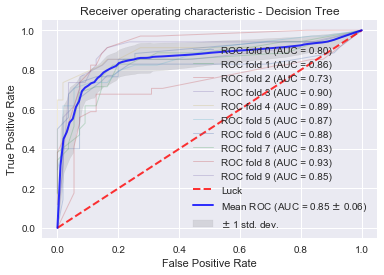

Accuracy:  83.2829985246
Precision:  83.8755491821
Recall:  80.6445264975
F1-Score:  81.5309293922


In [272]:
#Decision Tree
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = DecisionTreeClassifier(criterion = "gini", random_state = 50, max_depth=6, min_samples_leaf=6)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

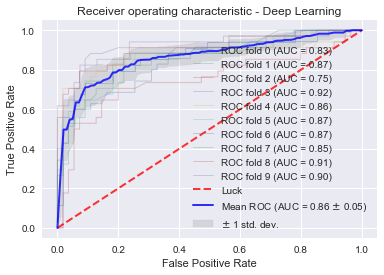

Accuracy:  82.6176937919
Precision:  83.0912598954
Recall:  79.9306227542
F1-Score:  80.7202607903


In [273]:
#Deep Learning
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,9,7), activation='tanh')
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Deep Learning')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

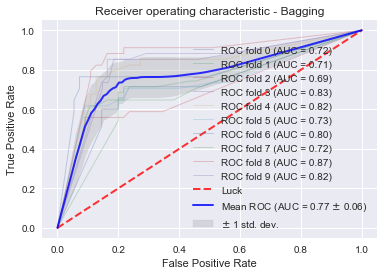

Accuracy:  79.0257065032
Precision:  78.3450915227
Recall:  77.1941685765
F1-Score:  77.4105912485


In [274]:
#Bagging
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = BaggingClassifier(n_estimators=10, bootstrap=False, warm_start=False)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Bagging')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

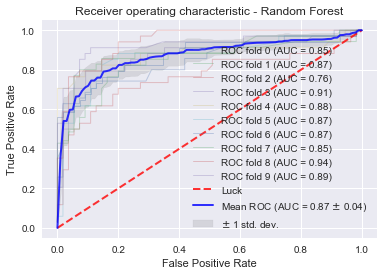

Accuracy:  83.3891726251
Precision:  83.1388752984
Recall:  81.3823387941
F1-Score:  81.8909010141


In [275]:
#RandomForest
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=150)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

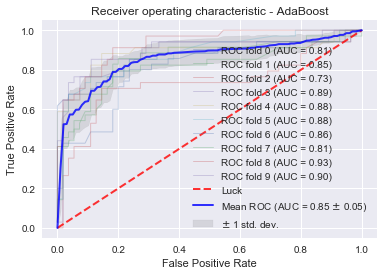

Accuracy:  82.4977017365
Precision:  81.9978522979
Recall:  81.0104405399
F1-Score:  81.2185990039


In [276]:
#AdaBoost
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=4), algorithm="SAMME",n_estimators=200)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

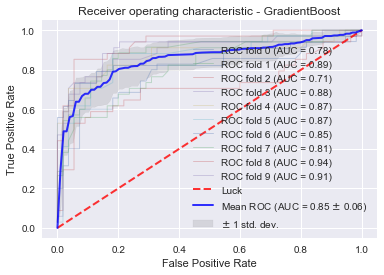

Accuracy:  80.4789751447
Precision:  79.9663752084
Recall:  78.6500155618
F1-Score:  78.9071064903


In [277]:
#GradientBoosting
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=20)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GradientBoost')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

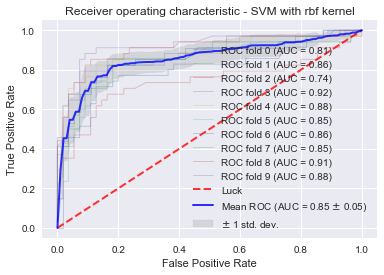

Accuracy:  82.2755646351
Precision:  81.9801684159
Recall:  80.2738590386
F1-Score:  80.6746076681


In [278]:
#SVM
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = SVC(kernel='rbf', C=1, probability=True)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - SVM with rbf kernel')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

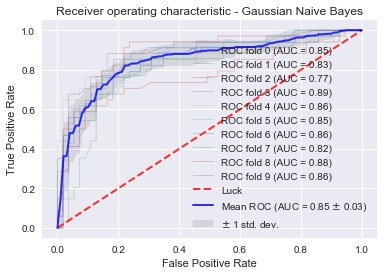

Accuracy:  79.6911531041
Precision:  78.7023226971
Recall:  78.2784285431
F1-Score:  78.3495615589


In [279]:
#Naive Bayes
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = GaussianNB()
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

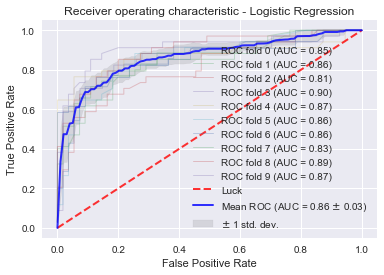

Accuracy:  80.3590682102
Precision:  79.5442132842
Recall:  78.6529157117
F1-Score:  78.8847310667


In [280]:
#Logistic Regression
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(penalty='l2', solver='liblinear', max_iter=100)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)

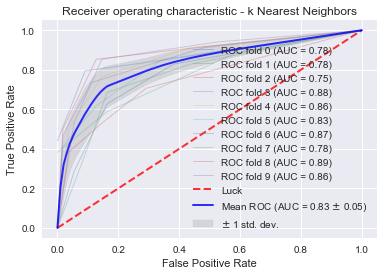

Accuracy:  80.1456418114
Precision:  79.2138614836
Recall:  78.3287072405
F1-Score:  78.5739191594


In [281]:
#kNN
random_state = np.random.RandomState(0)
tprs = []
aucs = []
acc=[]
prec=[]
rec=[]
f1=[]
mean_fpr = np.linspace(0, 1, 100)
i = 0
cv = StratifiedKFold(n_splits=10)
classifier = KNeighborsClassifier(n_neighbors=3)
for train, test in cv.split(x, y):
    probas_ = classifier.fit(x[train], y[train]).predict_proba(x[test])
    y_pred = classifier.predict(x[test])
    acc.append(accuracy_score(y[test], y_pred))
    prec.append(precision_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    rec.append(recall_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    f1.append(f1_score(y[test], y_pred, average='macro', labels=np.unique(y_pred)))
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
            label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Luck', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - k Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()
accsum=0
precsum=0
recsum=0
f1sum=0
for j in acc:
    accsum+=j*100
avgacc=accsum/10
for j in prec:
    precsum+=j*100
avgprec=precsum/10
for j in rec:
    recsum+=j*100
avgrec=recsum/10
for j in f1:
    f1sum+=j*100
avgf1=f1sum/10
print('Accuracy: ',avgacc)
print('Precision: ',avgprec)
print('Recall: ',avgrec)
print('F1-Score: ',avgf1)